In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

try:
    # Input: Function String and Point
    function_str = input("Enter a function: ").strip()

    # Check if the input function is valid
    if not function_str:
        raise ValueError("Error: Function string cannot be empty")

    point_str = input("Enter a point: ").strip()

    # Check if the input point is valid
    if not point_str:
        raise ValueError("Error: Point cannot be empty")

    # Parse the point input
    try:
        point = float(point_str)
    except ValueError:
        raise ValueError("Error: Invalid point input. Please enter a valid numeric value.")

    # Ensure the function string contains 'x'
    if 'x' not in function_str:
        raise ValueError("Error: The function must contain the variable 'x'")

    # Check if the parsed function is valid
    try:
        x = sp.symbols('x')
        parsed_function = sp.sympify(function_str)
        # Ensure the parsed_function contains 'x' as a symbol
        if 'x' not in parsed_function.free_symbols:
            raise ValueError("Error: The function must contain the variable 'x'")
    except (sp.SympifyError, SyntaxError):
        raise ValueError("Error: Invalid function syntax. Please enter a valid mathematical expression.")


    # Make a table of values around the point
    x_values = np.linspace(point - 2, point + 2, 100)
    y_values = [parsed_function.subs(x, val) for val in x_values]

    # Print the table of values
    print("Table of Values:")
    print("x\t|  y")
    print("-" * 15)
    for x_val, y_val in zip(x_values, y_values):
        print(f"{x_val:.2f}\t| {y_val}")

except ValueError as e:
    print(f"Input Error: {e}")
except KeyboardInterrupt:
    print("Operation interrupted by the user.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Enter a function: x**2
Enter a point: 3
Input Error: Error: The function must contain the variable 'x'


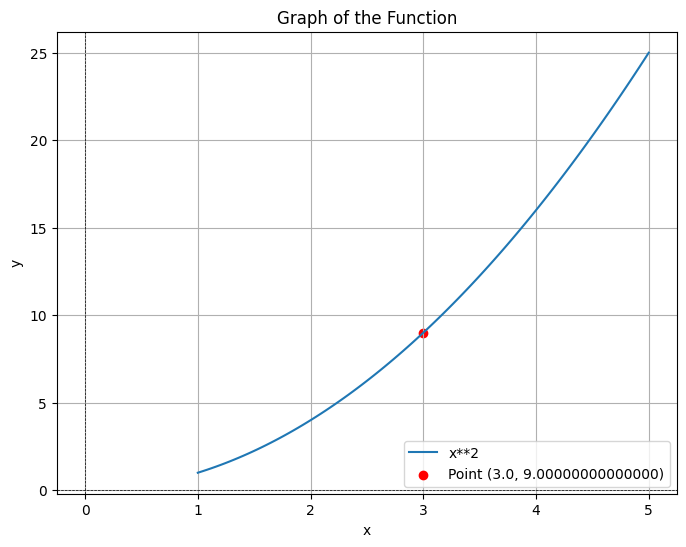

In [2]:
# Assuming you've already collected function_str, point, and parsed_function

try:
    # Calculate x_values and y_values for plotting the graph
    x_values = np.linspace(point - 2, point + 2, 100)
    y_values = [parsed_function.subs(x, val) for val in x_values]

    # Plotting the graph
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label=f'{function_str}')
    plt.scatter([point], [parsed_function.subs(x, point)], color='red', label=f'Point ({point}, {parsed_function.subs(x, point)})', marker='o')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Graph of the Function')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [3]:
# Assuming you've already collected parsed_function and point

try:
    # Calculate the limits
    try:
        limit_left = sp.limit(parsed_function, x, point, dir='-')
        limit_right = sp.limit(parsed_function, x, point, dir='+')
    except sp.PoleError:
        print("Function has a pole at this point.")
    except sp.ComplexInfinity:
        print("Function approaches complex infinity at this point.")
    except Exception as e:
        print(f"Error calculating limits: {e}")
    else:
        # Print the limits
        print(f'Limit from the left at x={point}: {limit_left}')
        print(f'Limit from the right at x={point}: {limit_right}')

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Limit from the left at x=3.0: 9.00000000000000
Limit from the right at x=3.0: 9.00000000000000
